In [28]:
import os
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score
from pathlib import Path

# === CONFIGURATION ===
img_size = (224, 224)
batch_size = 32
epochs = 50
num_classes = 5
l2_lambda = 0.01
k_folds = 5

base_dir = Path("splitted_data_kfold")
results = []

# === DATA AUGMENTATION ===
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1
)
val_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
# === MODEL BUILDER ===
def build_model():
    model = models.Sequential([
        # Layer 1
        layers.Conv2D(32, (3,3), activation='relu', input_shape=img_size + (3,)),
        layers.MaxPooling2D((2,2), strides=2),

        # Layer 2
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2), strides=2),
        layers.Dropout(0.2),

        # Layer 3
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.AveragePooling2D((2,2), strides=2),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


🔹 Fold 1/5
Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Class indices: {'American_Bulldog': 0, 'German_Shorthaired': 1, 'Havanese': 2, 'Maine_Coon': 3, 'Pomeranian': 4}
American_Bulldog : 160
German_Shorthaired : 160
Havanese : 160
Maine_Coon : 160
Pomeranian : 160


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 796ms/step - accuracy: 0.1925 - loss: 2.8153 - val_accuracy: 0.2050 - val_loss: 2.0747
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 770ms/step - accuracy: 0.2250 - loss: 1.9101 - val_accuracy: 0.2600 - val_loss: 1.7647
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 814ms/step - accuracy: 0.3025 - loss: 1.7001 - val_accuracy: 0.3200 - val_loss: 1.7021
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 814ms/step - accuracy: 0.3663 - loss: 1.6020 - val_accuracy: 0.4150 - val_loss: 1.5617
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 798ms/step - accuracy: 0.4825 - loss: 1.4182 - val_accuracy: 0.3900 - val_loss: 1.6102
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 798ms/step - accuracy: 0.5175 - loss: 1.3537 - val_accuracy: 0.4000 - val_loss: 1.5188
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 795ms/step - accuracy: 0.5462 - loss: 1.2501 - val_accuracy: 0.4800 - val_loss: 1.5192
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 809ms/step - accuracy: 0.5725 - loss: 1.2474 - val_accu

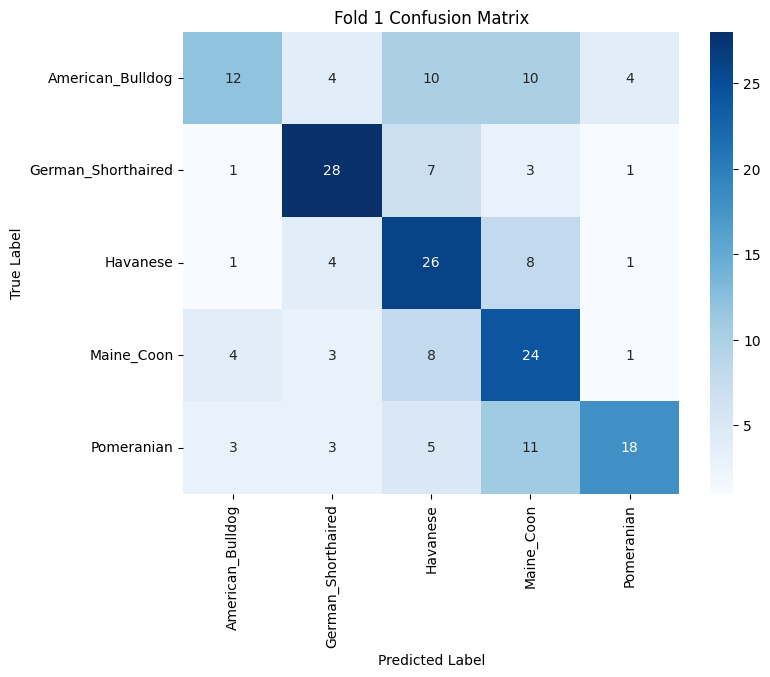

Prediction distribution for Fold 1: {'American_Bulldog': 21, 'German_Shorthaired': 42, 'Havanese': 56, 'Maine_Coon': 56, 'Pomeranian': 25}

🔹 Fold 2/5
Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Class indices: {'American_Bulldog': 0, 'German_Shorthaired': 1, 'Havanese': 2, 'Maine_Coon': 3, 'Pomeranian': 4}
American_Bulldog : 160
German_Shorthaired : 160
Havanese : 160
Maine_Coon : 160
Pomeranian : 160


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 850ms/step - accuracy: 0.2025 - loss: 2.6441 - val_accuracy: 0.2000 - val_loss: 2.0019
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 936ms/step - accuracy: 0.2988 - loss: 1.8141 - val_accuracy: 0.3400 - val_loss: 1.6404
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 905ms/step - accuracy: 0.4000 - loss: 1.5373 - val_accuracy: 0.4200 - val_loss: 1.5182
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 900ms/step - accuracy: 0.4750 - loss: 1.4117 - val_accuracy: 0.4600 - val_loss: 1.4535
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 847ms/step - accuracy: 0.4925 - loss: 1.3238 - val_accuracy: 0.4950 - val_loss: 1.5273
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 903ms/step - accuracy: 0.5300 - loss: 1.2743 - val_accuracy: 0.4950 - val_loss: 1.4080
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 914ms/step - accuracy: 0.5825 - loss: 1.2112 - val_accuracy: 0.5300 - val_loss: 1.4538
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 883ms/step - accuracy: 0.5938 - loss: 1.2230 - val_accu

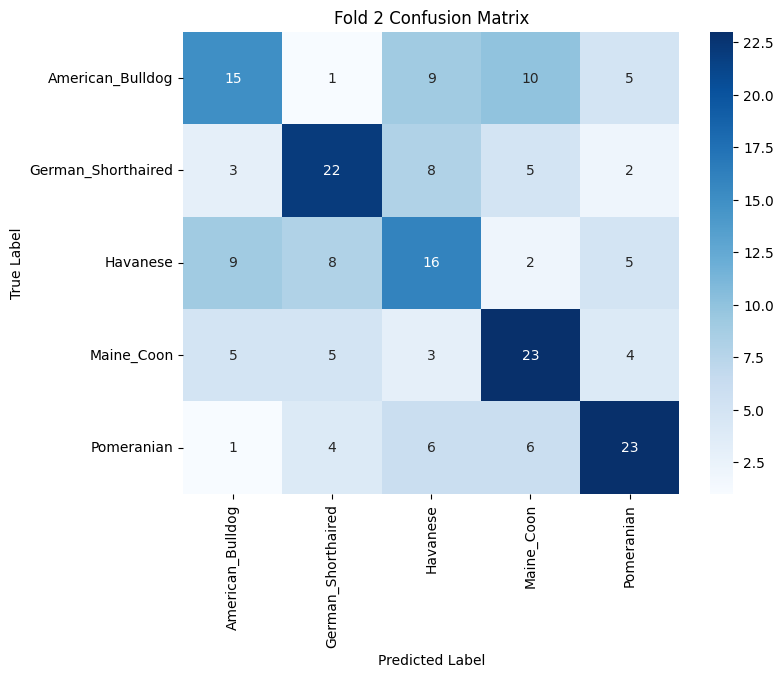

Prediction distribution for Fold 2: {'American_Bulldog': 33, 'German_Shorthaired': 40, 'Havanese': 42, 'Maine_Coon': 46, 'Pomeranian': 39}

🔹 Fold 3/5
Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Class indices: {'American_Bulldog': 0, 'German_Shorthaired': 1, 'Havanese': 2, 'Maine_Coon': 3, 'Pomeranian': 4}
American_Bulldog : 160
German_Shorthaired : 160
Havanese : 160
Maine_Coon : 160
Pomeranian : 160


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 857ms/step - accuracy: 0.2188 - loss: 2.8800 - val_accuracy: 0.2100 - val_loss: 2.1030
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 827ms/step - accuracy: 0.2637 - loss: 1.9253 - val_accuracy: 0.4400 - val_loss: 1.6813
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 976ms/step - accuracy: 0.4038 - loss: 1.6612 - val_accuracy: 0.4850 - val_loss: 1.5211
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 861ms/step - accuracy: 0.4187 - loss: 1.5632 - val_accuracy: 0.4050 - val_loss: 1.4978
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 914ms/step - accuracy: 0.4725 - loss: 1.4560 - val_accuracy: 0.5100 - val_loss: 1.3464
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 820ms/step - accuracy: 0.4950 - loss: 1.3586 - val_accuracy: 0.5250 - val_loss: 1.3538
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 851ms/step - accuracy: 0.5387 - loss: 1.2785 - val_accuracy: 0.4900 - val_loss: 1.4414
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 820ms/step - accuracy: 0.5312 - loss: 1.3101 - val_accu

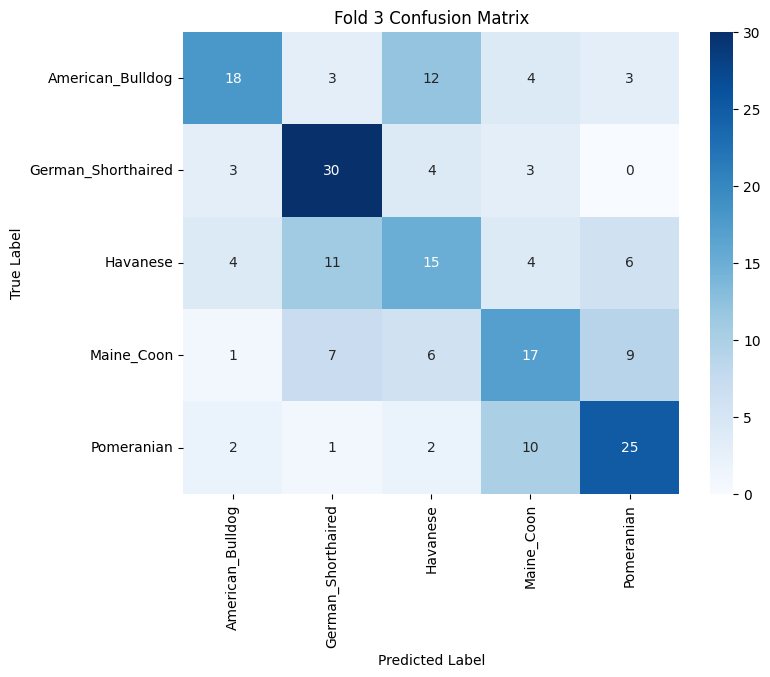

Prediction distribution for Fold 3: {'American_Bulldog': 28, 'German_Shorthaired': 52, 'Havanese': 39, 'Maine_Coon': 38, 'Pomeranian': 43}

🔹 Fold 4/5
Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Class indices: {'American_Bulldog': 0, 'German_Shorthaired': 1, 'Havanese': 2, 'Maine_Coon': 3, 'Pomeranian': 4}
American_Bulldog : 160
German_Shorthaired : 160
Havanese : 160
Maine_Coon : 160
Pomeranian : 160


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 912ms/step - accuracy: 0.2075 - loss: 2.8163 - val_accuracy: 0.2400 - val_loss: 2.0384
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 843ms/step - accuracy: 0.2400 - loss: 1.8721 - val_accuracy: 0.2650 - val_loss: 1.7328
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 880ms/step - accuracy: 0.2862 - loss: 1.6555 - val_accuracy: 0.2750 - val_loss: 1.6374
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 908ms/step - accuracy: 0.3525 - loss: 1.5623 - val_accuracy: 0.4250 - val_loss: 1.5265
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 903ms/step - accuracy: 0.4100 - loss: 1.5017 - val_accuracy: 0.4550 - val_loss: 1.5305
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 791ms/step - accuracy: 0.4575 - loss: 1.4261 - val_accuracy: 0.4700 - val_loss: 1.4386
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 844ms/step - accuracy: 0.5025 - loss: 1.3359 - val_accuracy: 0.4300 - val_loss: 1.4284
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 801ms/step - accuracy: 0.5537 - loss: 1.2789 - val_accu

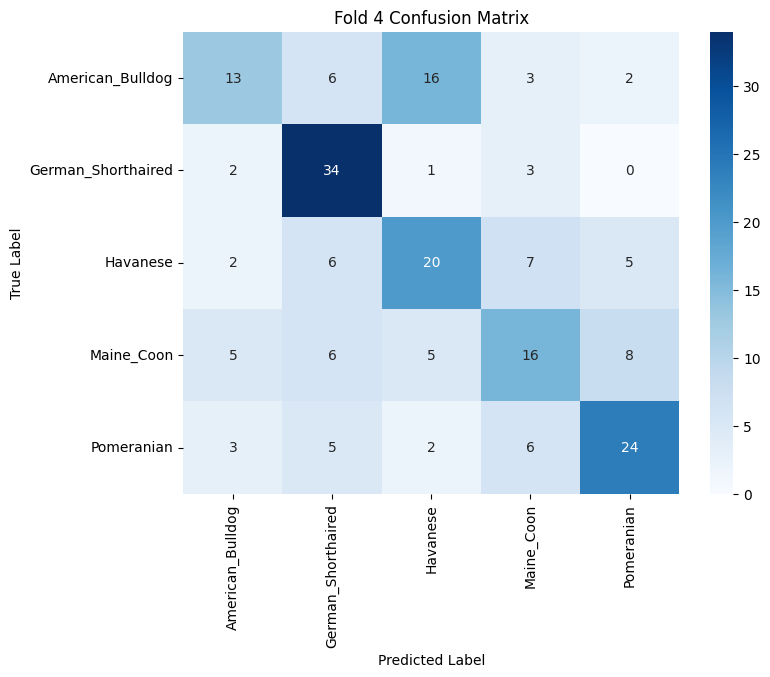

Prediction distribution for Fold 4: {'American_Bulldog': 25, 'German_Shorthaired': 57, 'Havanese': 44, 'Maine_Coon': 35, 'Pomeranian': 39}

🔹 Fold 5/5
Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Class indices: {'American_Bulldog': 0, 'German_Shorthaired': 1, 'Havanese': 2, 'Maine_Coon': 3, 'Pomeranian': 4}
American_Bulldog : 160
German_Shorthaired : 160
Havanese : 160
Maine_Coon : 160
Pomeranian : 160


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 994ms/step - accuracy: 0.2225 - loss: 3.6241 - val_accuracy: 0.2200 - val_loss: 2.4775
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 918ms/step - accuracy: 0.2450 - loss: 2.1990 - val_accuracy: 0.2600 - val_loss: 1.8810
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.3088 - loss: 1.8202 - val_accuracy: 0.3600 - val_loss: 1.7332
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 886ms/step - accuracy: 0.3750 - loss: 1.6102 - val_accuracy: 0.3300 - val_loss: 1.6852
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 928ms/step - accuracy: 0.4487 - loss: 1.5008 - val_accuracy: 0.4450 - val_loss: 1.5073
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 940ms/step - accuracy: 0.4837 - loss: 1.4293 - val_accuracy: 0.4200 - val_loss: 1.6030
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 910ms/step - accuracy: 0.5238 - loss: 1.3423 - val_accuracy: 0.5350 - val_loss: 1.3185
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 910ms/step - accuracy: 0.5437 - loss: 1.3107 - val_accurac

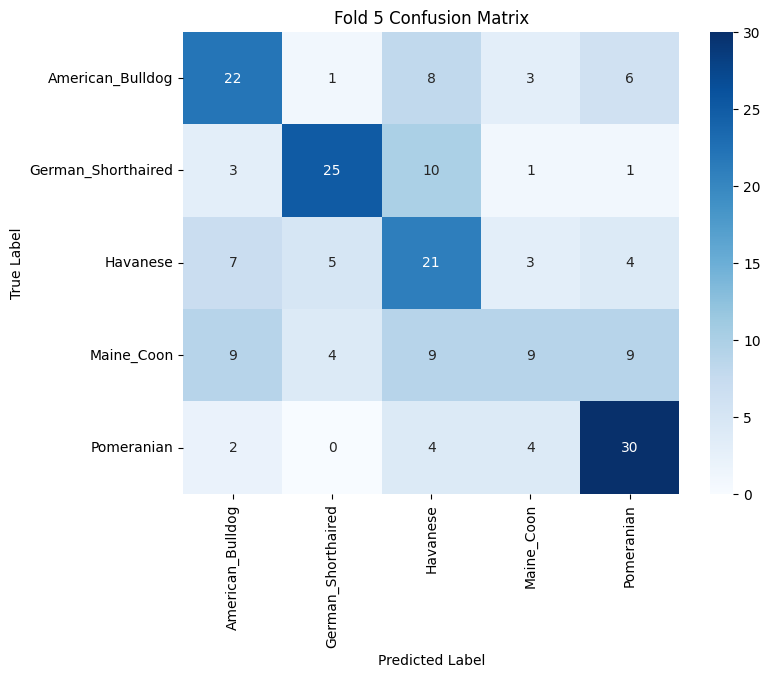

Prediction distribution for Fold 5: {'American_Bulldog': 43, 'German_Shorthaired': 35, 'Havanese': 52, 'Maine_Coon': 20, 'Pomeranian': 50}


In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === TRAIN & EVALUATE PER FOLD ===
for fold in range(1, k_folds + 1):
    print(f"\n🔹 Fold {fold}/{k_folds}")
    train_dir = base_dir / f"fold_{fold}" / "train"
    val_dir   = base_dir / f"fold_{fold}" / "val"

    # Generators per fold
    train_gen = train_datagen.flow_from_directory(
        train_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical"
    )
    val_gen = val_datagen.flow_from_directory(
        val_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical", shuffle=False
    )

    print("Class indices:", train_gen.class_indices)
    for cls, idx in train_gen.class_indices.items():
        print(cls, ":", sum(train_gen.classes == idx))

    model = build_model()
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]

    history = model.fit(
        train_gen,
        epochs=epochs,
        validation_data=val_gen,
        callbacks=callbacks,
        verbose=1
    )

    # Evaluate
    val_loss, val_acc = model.evaluate(val_gen, verbose=0)
    y_true = val_gen.classes
    y_pred = np.argmax(model.predict(val_gen, verbose=0), axis=1)
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"Fold {fold} Results: accuracy={val_acc:.4f}, loss={val_loss:.4f}, f1={f1:.4f}")
    results.append({'fold': fold, 'accuracy': val_acc, 'loss': val_loss, 'f1': f1})

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_gen.class_indices.keys(), yticklabels=train_gen.class_indices.keys())
    plt.title(f'Fold {fold} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # --- Prediction Distribution ---
    unique, counts = np.unique(y_pred, return_counts=True)
    pred_dist = dict(zip([list(train_gen.class_indices.keys())[i] for i in unique], counts))
    print(f"Prediction distribution for Fold {fold}: {pred_dist}")


In [36]:
# === AVERAGE METRICS ===
accs = [r['accuracy'] for r in results]
losses = [r['loss'] for r in results]
f1s = [r['f1'] for r in results]

avg_acc = np.mean(accs)
avg_loss = np.mean(losses)
avg_f1 = np.mean(f1s)
std_acc = np.std(accs)
std_f1 = np.std(f1s)

print("\n📊 5-Fold Cross Validation Summary:")
print(f"Accuracy : {avg_acc:.4f} ± {std_acc:.4f}")
print(f"F1-Score : {avg_f1:.4f} ± {std_f1:.4f}")
print(f"Loss     : {avg_loss:.4f}")

# Save metrics
os.makedirs("checkpoints_exp2", exist_ok=True)
with open("checkpoints_exp2/exp2_kfold_results.json", "w") as f:
    json.dump(results, f, indent=2)

# === FINAL MODEL TRAINING ON FULL DATA ===
print("\n🔸 Training final model on all available training data...")
final_train_dir = Path("splitted_data_kfold/full_train")

final_train_gen = train_datagen.flow_from_directory(
    final_train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True    # important for training
)

# Build model with best configuration found in cross-validation
final_model = build_model()

# Compile with stable parameters
final_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train on full data
history_final = final_model.fit(
    final_train_gen,
    epochs=epochs,
    verbose=1
)

# Save model
final_model.save("checkpoints_exp2/final_model.h5")

# Evaluate on the same data (for reference only)
final_loss, final_acc = final_model.evaluate(final_train_gen, verbose=0)
y_true_full = final_train_gen.classes
y_pred_full = np.argmax(final_model.predict(final_train_gen, verbose=0), axis=1)
final_f1 = f1_score(y_true_full, y_pred_full, average='macro')

print("\n📘 Final Model (Full Training Data) Results:")
print(f"Accuracy: {final_acc:.4f}")
print(f"Loss:     {final_loss:.4f}")
print(f"F1-Score: {final_f1:.4f}")


📊 5-Fold Cross Validation Summary:
Accuracy : 0.5105 ± 0.0439
F1-Score : 0.4959 ± 0.0502
Loss     : 1.3830

🔸 Training final model on all available training data...
Found 1000 images belonging to 5 classes.


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 819ms/step - accuracy: 0.2460 - loss: 3.4882
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 775ms/step - accuracy: 0.3020 - loss: 2.4776
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 792ms/step - accuracy: 0.3400 - loss: 2.0198
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 942ms/step - accuracy: 0.4220 - loss: 1.7569
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 795ms/step - accuracy: 0.4880 - loss: 1.5631
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 853ms/step - accuracy: 0.5200 - loss: 1.4666
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 953ms/step - accuracy: 0.5420 - loss: 1.3805
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 947ms/step - accuracy: 0.5800 - loss: 1.2960
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 920ms/step - accuracy: 0.5820 - loss: 1.2586
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.5890 - loss: 1.2379
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6190 - loss: 1.1900
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 960m


📘 Final Model (Full Training Data) Results:
Accuracy: 0.9530
Loss:     0.4417
F1-Score: 0.1848


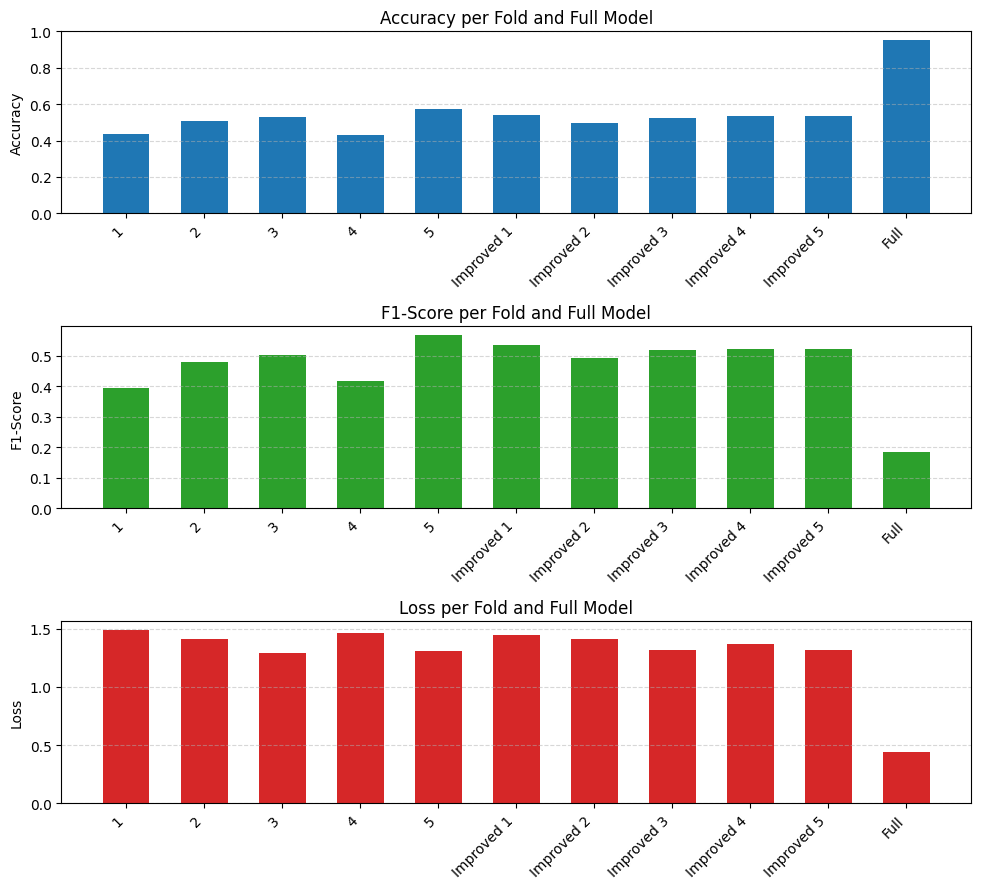

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# --- Prepare labels with duplicate handling ---
fold_labels = []
seen = {}
for r in results:
    f = r['fold']
    if f in seen:
        seen[f] += 1
        fold_labels.append(f"Improved {f}")
    else:
        seen[f] = 1
        fold_labels.append(str(f))

# Add final model
fold_labels.append("Full")

# --- Extract metrics ---
accs = [r['accuracy'] for r in results] + [final_acc]
f1s = [r['f1'] for r in results] + [final_f1]
losses = [r['loss'] for r in results] + [final_loss]

x = np.arange(len(fold_labels))

# --- Plot setup ---
fig, axes = plt.subplots(3, 1, figsize=(10, 9))
width = 0.6

# Accuracy
axes[0].bar(x, accs, width, color='tab:blue')
axes[0].set_title("Accuracy per Fold and Full Model")
axes[0].set_ylabel("Accuracy")
axes[0].set_xticks(x)
axes[0].set_xticklabels(fold_labels, rotation=45, ha='right')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# F1-Score
axes[1].bar(x, f1s, width, color='tab:green')
axes[1].set_title("F1-Score per Fold and Full Model")
axes[1].set_ylabel("F1-Score")
axes[1].set_xticks(x)
axes[1].set_xticklabels(fold_labels, rotation=45, ha='right')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Loss
axes[2].bar(x, losses, width, color='tab:red')
axes[2].set_title("Loss per Fold and Full Model")
axes[2].set_ylabel("Loss")
axes[2].set_xticks(x)
axes[2].set_xticklabels(fold_labels, rotation=45, ha='right')
axes[2].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


